# Importamo e creiamo cartelle necessarie

In [ ]:
! pip install transformers
! pip install -U accelerate
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 2.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

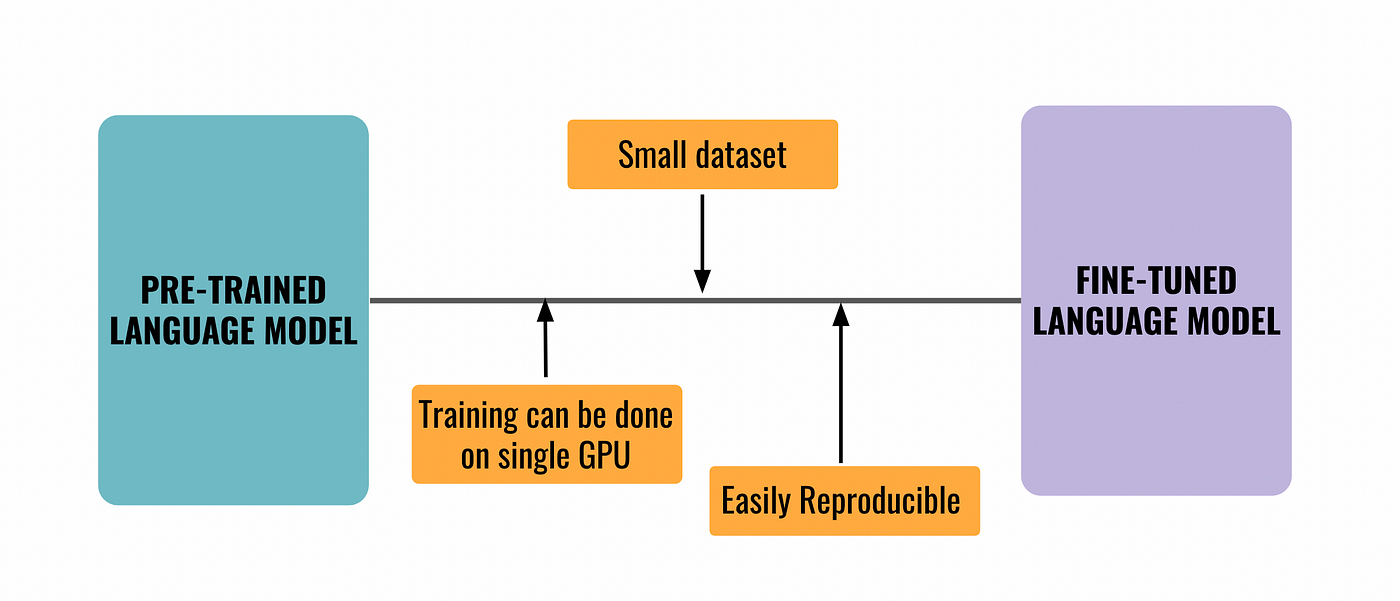

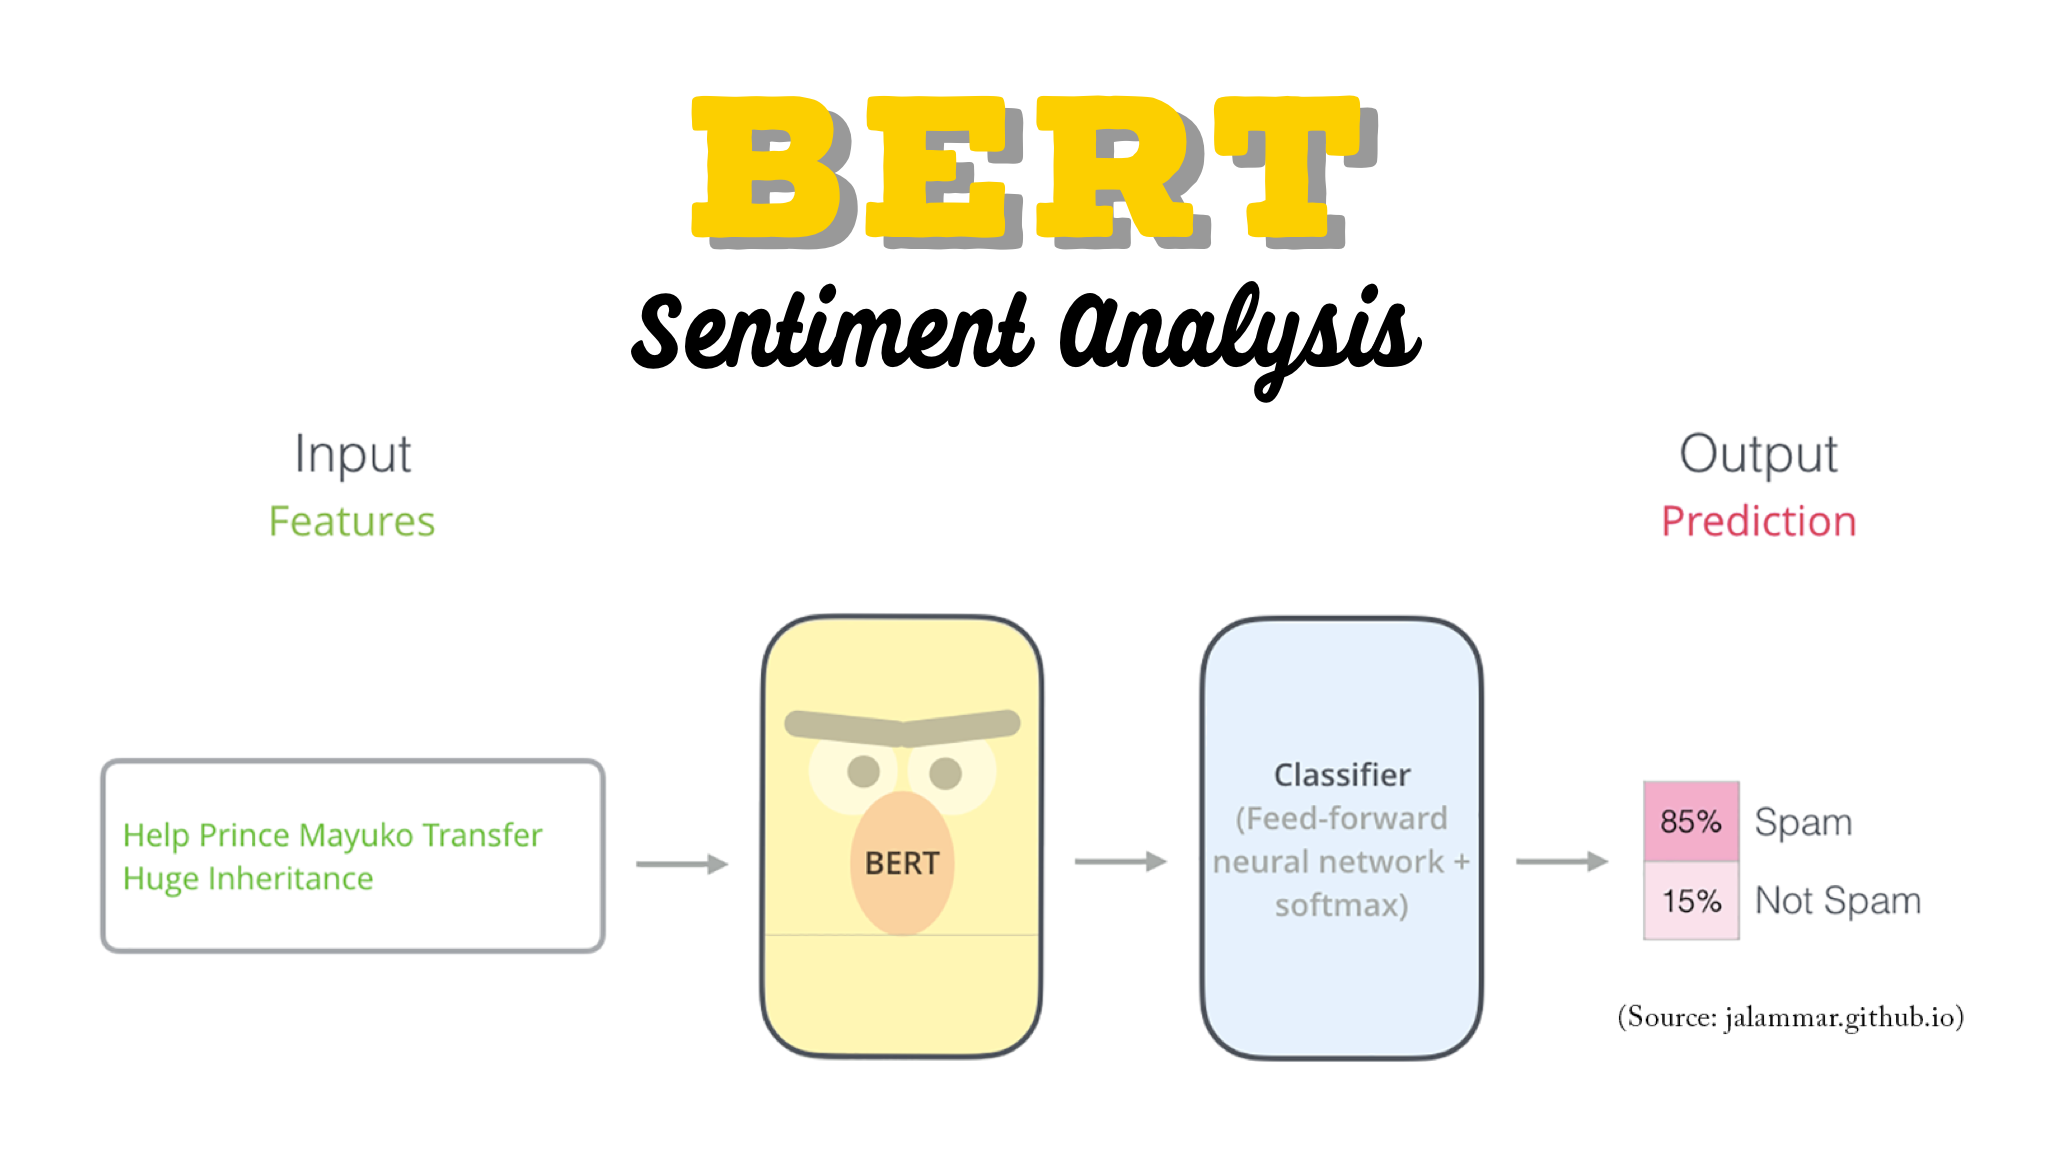

In [ ]:
import os

# Create a list of directories to create
dirs = ["checkpoints", "sample_hf_trainer"]

# Loop through the list and create each directory if it doesn't exist
for dir in dirs:
    if not os.path.exists(dir):
        os.makedirs(dir)


## Qualche  ``` utils ```



In [ ]:
from collections import defaultdict, Counter
import json

from matplotlib import pyplot as plt
import numpy as np
import torch

def print_encoding(model_inputs, indent = 4):
  indent_str = " " * indent
  print("{")
  for k, v in model_inputs.items():
    print(indent_str + k + ":")
    print(indent_str + indent_str + str(v))
  print("}")



# Recap Hugging Face Transformers

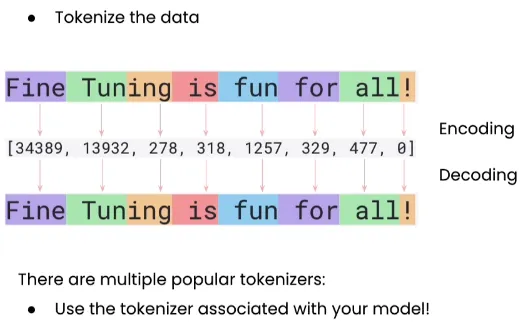

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("siebert/sentiment-roberta-large-english")
# Initialize the models
model = AutoModelForSequenceClassification.from_pretrained("siebert/sentiment-roberta-large-english")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

In [ ]:
inputs = "I'm excited to learn about Hugging Face Transformers!"
tokenized_inputs = tokenizer(inputs, return_tensors="pt")
outputs = model(**tokenized_inputs)

labels = ['NEGATIVE', 'POSITIVE']
prediction = torch.argmax(outputs.logits)

dash_line = "-".join(["-" for i in range(30)])

print("Inputs:")
print(inputs)
print(dash_line)
print("Tokenized Inputs:")
print_encoding(tokenized_inputs)
print(dash_line)
print("Model Outputs:")
print(outputs)
print(dash_line)
print(f"The prediction is {labels[prediction]}")

Inputs:
I'm excited to learn about Hugging Face Transformers!
-----------------------------------------------------------
Tokenized Inputs:
{
    input_ids:
        tensor([[    0,   100,   437,  2283,     7,  1532,    59, 30581,  3923, 12346,
         34379,   328,     2]])
    attention_mask:
        tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
}
-----------------------------------------------------------
Model Outputs:
SequenceClassifierOutput(loss=None, logits=tensor([[-3.7605,  2.9262]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
-----------------------------------------------------------
The prediction is POSITIVE


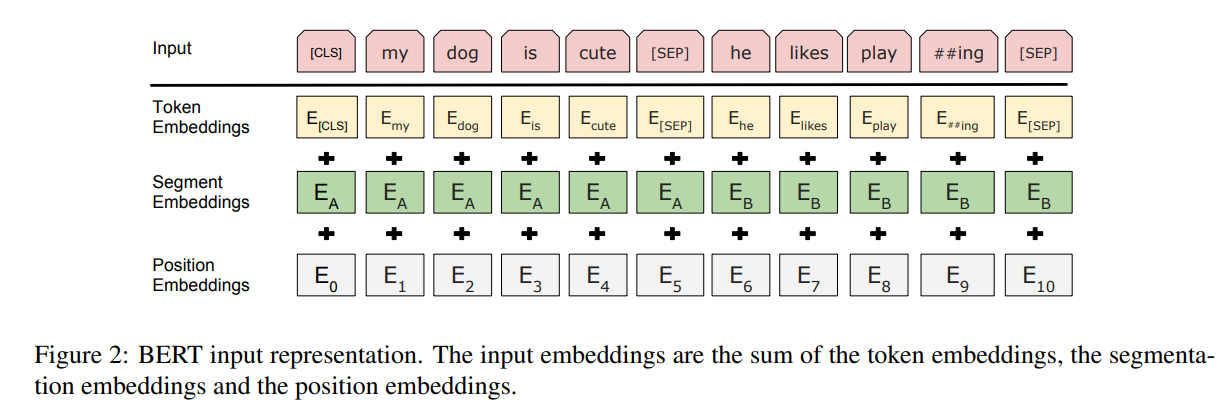

### Tokenizer

Modi diversi di fare la stessa cosa:

*  Ricordiamoci della classe `AutoTokenizer`

In [ ]:
from transformers import DistilBertTokenizer, DistilBertTokenizerFast, AutoTokenizer

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-cased")    # Written in Python
print(tokenizer)
print(dash_line)
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-cased")    # Written in Rust
print(tokenizer)
print(dash_line)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")    # Convenient default the fast
print(tokenizer)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

DistilBertTokenizer(name_or_path='distilbert-base-cased', vocab_size=28996, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
-----------------------------------------------------------
DistilBertTokenizerFast(name_or_

In [ ]:
# Calling the tokenizer
input_str = "Hugging Face Transformers is Great!"
tokenized_inputs = tokenizer(input_str)

print("Vanilla Tokenization")
print_encoding(tokenized_inputs)
print(dash_line)

# Accediaom agli item ricordiamoci che viene ritornato un dizionario
print(tokenized_inputs.input_ids)
print(tokenized_inputs["input_ids"])

Vanilla Tokenization
{
    input_ids:
        [101, 20164, 10932, 10289, 25267, 1110, 2038, 106, 102]
    attention_mask:
        [1, 1, 1, 1, 1, 1, 1, 1, 1]
}
-----------------------------------------------------------
[101, 20164, 10932, 10289, 25267, 1110, 2038, 106, 102]
[101, 20164, 10932, 10289, 25267, 1110, 2038, 106, 102]


In [ ]:
cls = [tokenizer.cls_token_id]
sep = [tokenizer.sep_token_id]

# Tokenization happens in a few steps:
input_tokens = tokenizer.tokenize(input_str)
input_ids = tokenizer.convert_tokens_to_ids(input_tokens)
input_ids_special_tokens = cls + input_ids + sep

decoded_str = tokenizer.decode(input_ids_special_tokens)

print("start:                ", input_str)
print("tokenize:             ", input_tokens)
print("convert_tokens_to_ids:", input_ids)
print("add special tokens:   ", input_ids_special_tokens)
print(dash_line)
print("decode:               ", decoded_str)

# The above steps don't create attention mask or add the special characters

start:                 Hugging Face Transformers is Great!
tokenize:              ['Hu', '##gging', 'Face', 'Transformers', 'is', 'Great', '!']
convert_tokens_to_ids: [20164, 10932, 10289, 25267, 1110, 2038, 106]
add special tokens:    [101, 20164, 10932, 10289, 25267, 1110, 2038, 106, 102]
-----------------------------------------------------------
decode:                [CLS] Hugging Face Transformers is Great! [SEP]


In [ ]:
# For Fast Tokenizers, there's another option too:
inputs = tokenizer._tokenizer.encode(input_str)

print(input_str)
print(dash_line)
print(f"Number of tokens: {len(inputs)}")
print(f"Ids: {inputs.ids}")
print(f"Tokens: {inputs.tokens}")
print(f"Special Tokens mask: {inputs.special_tokens_mask}")
print(dash_line)
print("char_to_word gives the wordpiecs of a charcter in the input")
char_idx = 8
print(f"For example, this {char_idx + 1}th character of the string is '{input_str[char_idx]}'," +\
      f" and it's part of wordpiece {inputs.char_to_token(char_idx)}, '{inputs.tokens[inputs.char_to_token(char_idx)]}'")

Hugging Face Transformers is Great!
-----------------------------------------------------------
Number of tokens: 9
Ids: [101, 20164, 10932, 10289, 25267, 1110, 2038, 106, 102]
Tokens: ['[CLS]', 'Hu', '##gging', 'Face', 'Transformers', 'is', 'Great', '!', '[SEP]']
Special Tokens mask: [1, 0, 0, 0, 0, 0, 0, 0, 1]
-----------------------------------------------------------
char_to_word gives the wordpiecs of a charcter in the input
For example, this 9th character of the string is 'F', and it's part of wordpiece 3, 'Face'


In [ ]:
# The Tokenizer can return the PyTorch Tensors
model_inputs = tokenizer("Hugging Face Transformers is Great!", return_tensors = "pt")
print("PyTorch Tensors:")
print_encoding(model_inputs)

PyTorch Tensors:
{
    input_ids:
        tensor([[  101, 20164, 10932, 10289, 25267,  1110,  2038,   106,   102]])
    attention_mask:
        tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])
}


In [ ]:
model_inputs = tokenizer(["Hugging Face Transformers is Great!",
                          "The quick brown fox jumps over the lazy dog." +\
                          "Then the dog got up and ran away because she didn't like foxes.",
                          ],
                         return_tensors = "pt",
                         padding = True,
                         truncation = True)

print(f"Pad Token: {tokenizer.pad_token} | Pad token id: {tokenizer.pad_token_id}")
print("Padding")
print_encoding(model_inputs)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Pad Token: [PAD] | Pad token id: 0
Padding
{
    input_ids:
        tensor([[  101, 20164, 10932, 10289, 25267,  1110,  2038,   106,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0],
        [  101,  1109,  3613,  3058, 17594, 15457,  1166,  1103, 16688,  3676,
           119,  1599,  1103,  3676,  1400,  1146,  1105,  1868,  1283,  1272,
          1131,  1238,   112,   189,  1176, 17594,  1279,   119,   102]])
    attention_mask:
        tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1]])
}


In [ ]:
# We can also decode the whole batch at once:

print("Batch Decode:")
print(tokenizer.batch_decode(model_inputs.input_ids))
print(dash_line)
print("Batch Decode: (no special charcters)")
print(tokenizer.batch_decode(model_inputs.input_ids, skip_special_tokens = True))


Batch Decode:
['[CLS] Hugging Face Transformers is Great! [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]', "[CLS] The quick brown fox jumps over the lazy dog. Then the dog got up and ran away because she didn't like foxes. [SEP]"]
-----------------------------------------------------------
Batch Decode: (no special charcters)
['Hugging Face Transformers is Great!', "The quick brown fox jumps over the lazy dog. Then the dog got up and ran away because she didn't like foxes."]


### Models:

1.  **DistilBertForSequenceClassification**: Questa linea di codice importa e istanzia esplicitamente il modello `DistilBertForSequenceClassification`, che è una classe specifica per la classificazione di sequenze utilizzando l'architettura DistilBERT. In questo caso, stiamo dichiarando chiaramente che vogliamo utilizzare quella specifica classe per la nostra classificazione di sequenze.
    
2.  **AutoModelForSequenceClassification**: Questa linea di codice utilizza `AutoModelForSequenceClassification`, che è parte del meccanismo di 'Auto' di Hugging Face. Questo meccanismo consente di caricare automaticamente il modello corretto in base all'architettura specificata nel nome del modello fornito a `from_pretrained()`. Quando si utilizza `AutoModelForSequenceClassification`, non è necessario specificare esplicitamente il modello da utilizzare. Il modello viene determinato automaticamente in base al nome del modello fornito.
    

In entrambi i casi, il modello `distilbert-base-cased` viene caricato per la classificazione di sequenze con due etichette (`num_labels = 2`). La differenza principale è nell'approccio utilizzato per caricare il modello, con `DistilBertForSequenceClassification` che specifica esplicitamente il tipo di modello e `AutoModelForSequenceClassification` che lo determina automaticamente in base al nome fornito. Entrambi i metodi sono validi e possono essere utilizzati a seconda delle preferenze dello sviluppatore.


In [ ]:
from transformers import AutoModelForSequenceClassification, DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels = 2)
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels = 2)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_inputs = tokenizer(input_str, return_tensors="pt")

# Option 1
model_outputs = model(input_ids = model_inputs.input_ids, attention_mask = model_inputs.attention_mask)

# Option 2
# - The keys of the dictionary the tokenizer returns are the same as keyword arguments
    # The model expects
# f({k1 : v1, k2 : v2}) = f(k1 = v1, k2 = v2)

model_outputs = model(**model_inputs)

print(model_inputs)
print(dash_line)
print(model_outputs)
print(dash_line)
print(f"Distribution over labels: {torch.softmax(model_outputs.logits, dim = 1)}")


{'input_ids': tensor([[  101, 20164, 10932, 10289, 25267,  1110,  2038,   106,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}
-----------------------------------------------------------
SequenceClassifierOutput(loss=None, logits=tensor([[-0.0818, -0.0883]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
-----------------------------------------------------------
Distribution over labels: tensor([[0.5016, 0.4984]], grad_fn=<SoftmaxBackward0>)


In [ ]:
#calcoliamo la loss normalmente
label = torch.tensor([1])
loss = torch.nn.functional.cross_entropy(model_outputs.logits, label)
print(loss)
loss.backward()

# You can get the parameters
list(model.named_parameters())[0]

tensor(0.6964, grad_fn=<NllLossBackward0>)


('distilbert.embeddings.word_embeddings.weight',
 Parameter containing:
 tensor([[-2.5130e-02, -3.3044e-02, -2.4396e-03,  ..., -1.0848e-02,
          -4.6824e-02, -9.4855e-03],
         [-4.8244e-03, -2.1486e-02, -8.7145e-03,  ..., -2.6029e-02,
          -3.7862e-02, -2.4103e-02],
         [-1.6531e-02, -1.7862e-02,  1.0596e-03,  ..., -1.6371e-02,
          -3.5670e-02, -3.1419e-02],
         ...,
         [-9.6466e-03,  1.4814e-02, -2.9182e-02,  ..., -3.7873e-02,
          -4.6263e-02, -1.6803e-02],
         [-1.3170e-02,  6.5378e-05, -3.7222e-02,  ..., -4.3558e-02,
          -1.1252e-02, -2.2152e-02],
         [ 1.1905e-02, -2.3293e-02, -2.2506e-02,  ..., -2.7136e-02,
          -4.3556e-02,  1.0529e-04]], requires_grad=True))

In [ ]:
# To calculate the loss we need to pass the label:
model_inputs = tokenizer(input_str, return_tensors="pt")

labels = ['NEGATIVE', 'POSITIVE']
model_inputs['labels'] = torch.tensor([1])

model_outputs = model(**model_inputs)

print(input_str)
print(dash_line)
print(model_outputs)
print(dash_line)
print(f"Model predictions:{labels[model_outputs.logits.argmax()]}")


Hugging Face Transformers is Great!
-----------------------------------------------------------
SequenceClassifierOutput(loss=tensor(0.6964, grad_fn=<NllLossBackward0>), logits=tensor([[-0.0818, -0.0883]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
-----------------------------------------------------------
Model predictions:NEGATIVE


In [ ]:
from transformers import AutoModel

model = AutoModel.from_pretrained('distilbert-base-cased',
                                  output_attentions = True,
                                  output_hidden_states = True)
model.eval()

model_inputs = tokenizer(input_str, return_tensors = "pt")
with torch.no_grad():
  model_output = model(**model_inputs)

print("Hidden state size (per layer): ", model_output.hidden_states[0].shape)
print("Attention head size (per layer): ", model_output.attentions[0].shape)    #(layer, batch, query_word_idx, key_word_idxs)
                                                                                # y-axis is query, x-axis is key
#print(model_output)

Hidden state size (per layer):  torch.Size([1, 9, 768])
Attention head size (per layer):  torch.Size([1, 12, 9, 9])


['[CLS]', 'Hu', '##gging', 'Face', 'Transformers', 'is', 'Great', '!', '[SEP]']
-----------------------------------------------------------


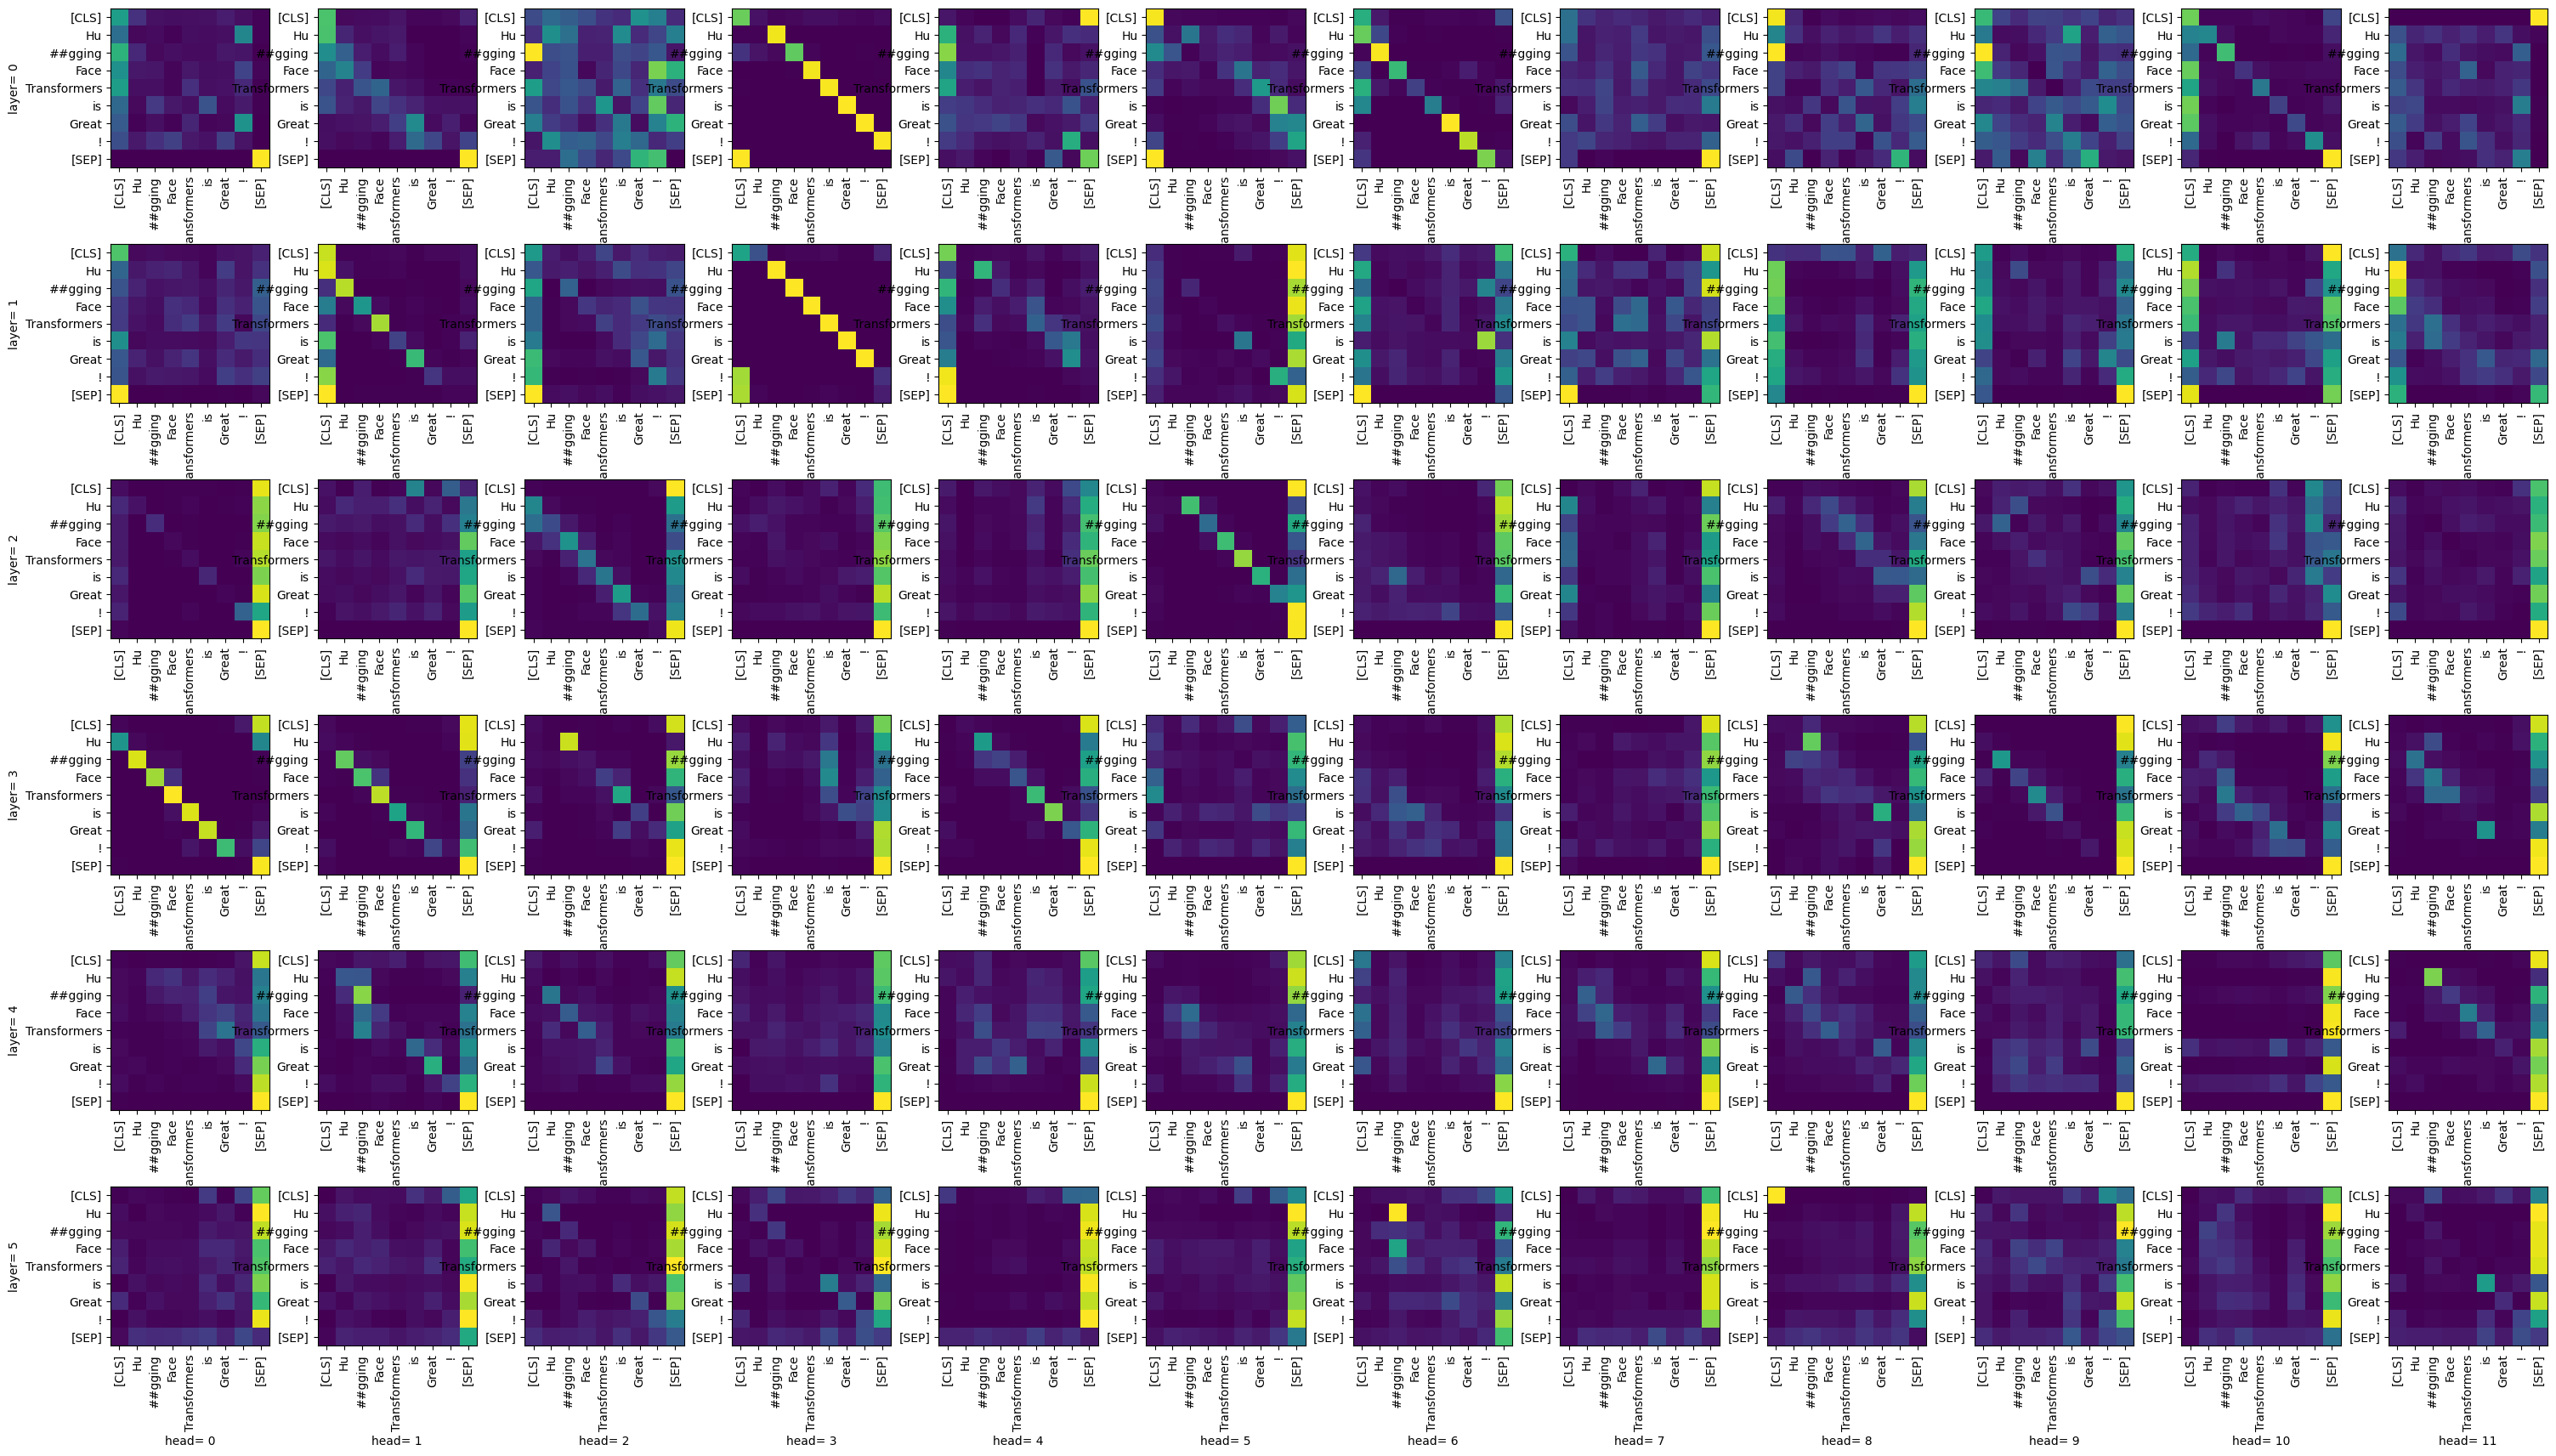

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(model_inputs.input_ids[0])
print(tokens)
print(dash_line)

n_layers = len(model_output.attentions)
n_heads = len(model_output.attentions[0][0])
fig, axes = plt.subplots(6, 12)
fig.set_size_inches(18.5*2, 10.5*2)
for layer in range(n_layers):
  for i in range(n_heads):
    axes[layer, i].imshow(model_output.attentions[layer][0, i])
    axes[layer][i].set_xticks(list(range(9)))
    axes[layer][i].set_xticklabels(labels = tokens, rotation = "vertical")
    axes[layer][i].set_yticks(list(range(9)))
    axes[layer][i].set_yticklabels(labels = tokens)

    if layer == 5:
      axes[layer, i].set(xlabel = f"head= {i}")
    if i == 0:
      axes[layer, i].set(ylabel = f"layer= {layer}")

plt.subplots_adjust(wspace = 0.3)
plt.show()

# Finetuning  

### Loading the Dataset

In [ ]:
from datasets import load_dataset, DatasetDict

imdb_dataset = load_dataset("imdb")

# prendiamo i primi 50 token per semplicità
def truncate(example):
  return {
      'text': " ".join(example['text'].split()[:50]),
      'label': example['label']
      }

small_imdb_dataset = DatasetDict(
          train = imdb_dataset['train'].shuffle(seed = 1111).select(range(128)).map(truncate),
          val = imdb_dataset['train'].shuffle(seed = 1111).select(range(128, 160)).map(truncate)
          )


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

In [ ]:
# Looking at the dataset
small_imdb_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 128
    })
    val: Dataset({
        features: ['text', 'label'],
        num_rows: 32
    })
})

In [ ]:
# Looking at the data
small_imdb_dataset['train'][:10]

{'text': ["Probably Jackie Chan's best film in the 1980s, and the one that put him on the map. The scale of this self-directed police drama is evident from the opening and closing scenes, during which a squatters' village and shopping mall are demolished. There are, clearly, differences between the original Chinese",
  'A wonderful movie! Anyone growing up in an Italian family will definitely see themselves in these characters. A good family movie with sadness, humor, and very good acting from all. You will enjoy this movie!! We need more like it.',
  'HORRENDOUS! Avoid like the plague. I would rate this in the top 10 worst movies ever. Special effects, acting, mood, sound, etc. appear to be done by day care students...wait, I have seen programs better than this. Opens like a soft porn show with a blurred nude female doing a',
  'And I absolutely adore Isabelle Blais!!! She was so cute in this movie, and far different from her role in "Quebec-Montreal" where she was more like a man-eat

In [ ]:
# Applica la tokenizzazione a un dataset
small_tokenized_dataset = small_imdb_dataset.map(
    # Tokenizza ogni elemento del dataset usando la funzione tokenizer
    lambda example: tokenizer(example['text'], padding=True, truncation=True),  # Aggiunge padding e troncamento per uniformità di lunghezza
    batched=True,  # Applica la tokenizzazione a batch di esempi
    batch_size=16  # Dimensione del batch per la tokenizzazione
)

# Rimuove la colonna "text" dal dataset tokenizzato
small_tokenized_dataset = small_tokenized_dataset.remove_columns(["text"])

# Rinomina la colonna "label" in "labels" per la compatibilità con i modelli PyTorch
small_tokenized_dataset = small_tokenized_dataset.rename_column("label", "labels")

# Imposta il formato del dataset su PyTorch per l'utilizzo con modelli PyTorch
small_tokenized_dataset.set_format("torch")

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

In [ ]:
small_tokenized_dataset['train'][0:2]

{'labels': tensor([1, 1]),
 'input_ids': tensor([[  101, 10109,  9662, 10185,   112,   188,  1436,  1273,  1107,  1103,
           3011,   117,  1105,  1103,  1141,  1115,  1508,  1140,  1113,  1103,
           4520,   119,  1109,  3418,  1104,  1142,  2191,   118,  2002,  2021,
           3362,  1110, 10238,  1121,  1103,  2280,  1105,  5134,  4429,   117,
           1219,  1134,   170,  4816,  6718, 18899,   112,  1491,  1105,  6001,
           8796,  1132,  6515,   119,  1247,  1132,   117,  3817,   117,  5408,
           1206,  1103,  1560,  1922,   102,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0],
         [  101,   138,  7310,  2523,   106, 15859,  2898,  1146,  1107,  1126,
           2169,  1266,  1209,  5397,  1267,  2310,  1107,  1292,  2650,   119,
            138,  1363,  1266,  2523,  1114, 12928,   1

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(small_tokenized_dataset['train'],
                              batch_size = 16)

eval_dataloader = DataLoader(small_tokenized_dataset['val'],
                             batch_size = 16)

### Training

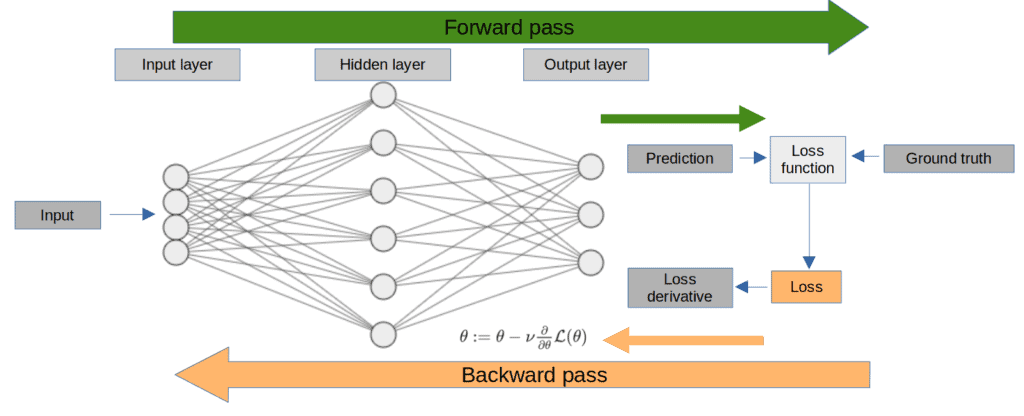

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup  # Importa le librerie necessarie
from tqdm.notebook import tqdm  # Importa la barra di progresso TQDM per visualizzare l'avanzamento del training

# Carica il modello DistilBert per classificazione di sequenze con due etichette
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels=2)

# Configurazione per l'addestramento
num_epochs = 3  # Numero di epoche per il training
num_training_steps = num_epochs * len(train_dataloader)  # Calcola il numero totale di passi di training
optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)  # Configura l'ottimizzatore con learning rate e decay
lr_scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=0, num_training_steps=num_training_steps  # Definisce la schedulazione del learning rate
)

best_val_loss = float("inf")  # Inizializza il miglior valore di validazione con infinito
progress_bar = tqdm(range(num_training_steps))  # Barra di progresso per visualizzare il progresso del training

# Ciclo principale di addestramento
for epoch in range(num_epochs):
    # Imposta il modello in modalità di addestramento
    model.train()

    # Itera sui batch di dati per l'addestramento
    for batch_i, batch in enumerate(train_dataloader):
        # Passa il batch attraverso il modello per ottenere gli output
        output = model(**batch)

        # Inizializza i gradienti, esegue il backpropagation e aggiorna i pesi
        optimizer.zero_grad()  # Azzera i gradienti
        output.loss.backward()  # Calcola i gradienti del loss
        optimizer.step()  # Aggiorna i pesi con l'ottimizzatore
        lr_scheduler.step()  # Aggiorna la schedulazione del learning rate

        # Aggiorna la barra di progresso
        progress_bar.update(1)

    # Ciclo di validazione
    model.eval()  # Imposta il modello in modalità di valutazione
    loss = 0  # Inizializza la variabile per il calcolo della perdita totale di validazione
    for batch_i, batch in enumerate(eval_dataloader):
        # Disabilita il calcolo dei gradienti durante la validazione
        with torch.no_grad():
            # Ottiene gli output del modello per il batch
            output = model(**batch)
        # Somma la perdita per il batch alla perdita totale
        loss += output.loss

    # Calcola la perdita media di validazione
    avg_val_loss = loss / len(eval_dataloader)  # Calcola la media della perdita

    # Stampa la perdita media di validazione
    print(f"Validation Loss: {avg_val_loss}")

    # Salva il checkpoint se la perdita di validazione è migliorata
    if avg_val_loss < best_val_loss:
        print("Saving Checkpoint!")  # Indica che un checkpoint verrà salvato
        best_val_loss = avg_val_loss  # Aggiorna il miglior valore di perdita
        # Salva lo stato del modello e dell'ottimizzatore nel checkpoint
        torch.save({
                'epoch': epoch,  # Numero dell'epoca corrente
                'model_state_dict': model.state_dict(),  # Stato dei pesi del modello
                'optimizer_state_dict': optimizer.state_dict(),  # Stato dell'ottimizzatore
                'val_loss': best_val_loss,  # Miglior perdita di validazione
            },
            f"checkpoints/epoch_{epoch}.pt"  # Nome del file del checkpoint
        )


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/24 [00:00<?, ?it/s]

Validation Loss: 1.0288746356964111
Saving Checkpoint!
Validation Loss: 1.668538212776184
Validation Loss: 2.281891345977783


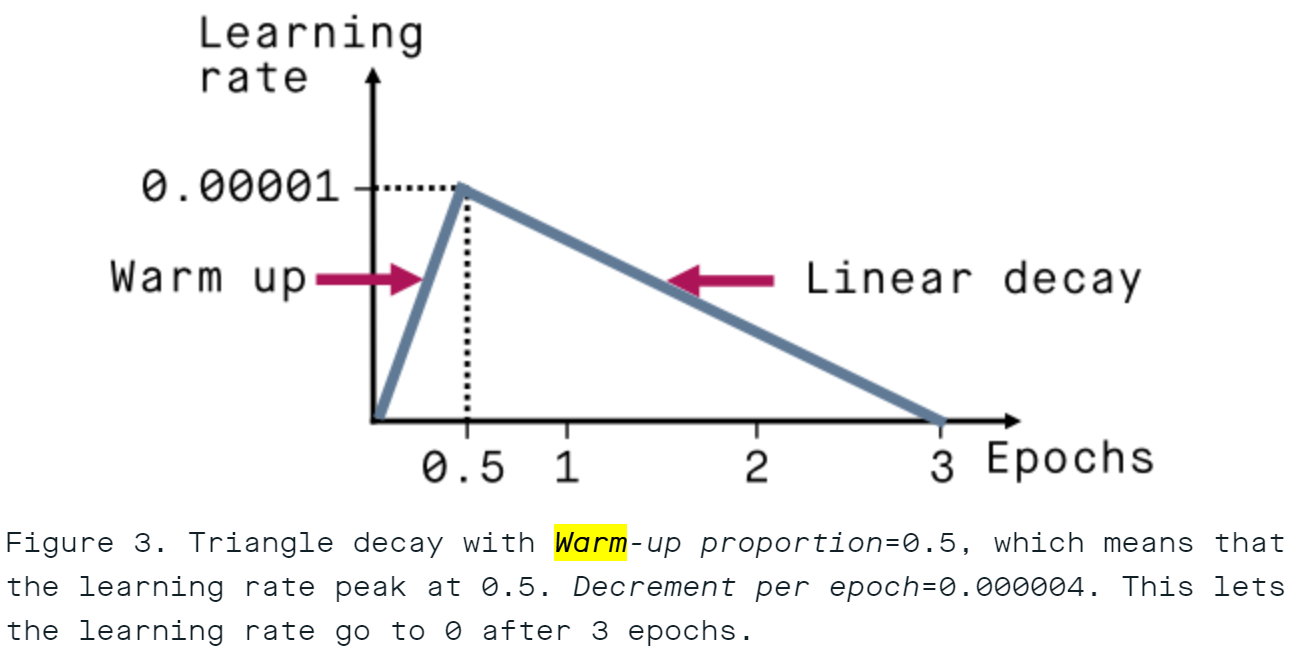

In [ ]:
# Using the hugging face trainer class

imdb_dataset = load_dataset("imdb")

small_imdb_dataset = DatasetDict(
    train = imdb_dataset['train'].shuffle(seed = 1111).select(range(128)).map(truncate),
    val = imdb_dataset['train'].shuffle(seed = 1111).select(range(128, 160)).map(truncate),
)

small_tokenized_dataset = small_imdb_dataset.map(
    lambda example: tokenizer(example['text'], truncation = True),
    batched = True,
    batch_size = 16
    )

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

**Trainer**
La classe `Trainer` fornisce un'API per un training completo in PyTorch e supporta l'addestramento distribuito su più GPU/TPU, la precisione mista per le GPU NVIDIA, le GPU AMD e torch.amp per PyTorch. Trainer va di pari passo con la classe `TrainingArguments`, che offre una vasta gamma di opzioni per personalizzare il modo in cui un modello viene addestrato. Insieme, queste due classi forniscono un'API di training completa.

`Trainer`
Crea un oggetto Trainer col tuo modello, training arguments, dataset di training e test, e funzione di valutazione:

`Seq2SeqTrainer` e `Seq2SeqTrainingArguments` ereditano dalle classi Trainer e TrainingArgument, e sono adattati per l'addestramento di modelli per attività di sequenza-a-sequenza, come riassunti o traduzioni.

La classe `Trainer` è ottimizzata per i modelli di 🤗 Transformers e può avere comportamenti sorprendenti se utilizzata con altri modelli. Quando la usi con il tuo modello, assicurati che:

il tuo modello restituisca sempre tuple o sottoclassi di `ModelOutput`
il tuo modello possa calcolare la perdita (loss) se viene fornito un argomento labels, e che la perdita venga restituita come primo elemento della tupla (se il tuo modello restituisce tuple)
il tuo modello possa accettare più argomenti label (usa `label_names` in `TrainingArguments` per indicare il loro nome a Trainer), ma nessuno di essi dovrebbe essere chiamato "label"

**Iperparametri per il training**

Successivamente, crea una classe TrainingArguments contenente tutti gli iperparametri che si possono regore nonché le variabili per attivare le differenti opzioni di addestramento. Per questa esercitazione puoi iniziare con gli iperparametri di ddestramento predefiniti, ma sentiti libero di sperimentare per trovare la configurazione ottimale per te.

**Memo**: Specifica dove salvare i checkpoints del tuo addestramento:


**Metriche**

Trainer non valuta automaticamente le performance del modello durante l’addestramento. Dovrai passare a Trainer una funzione che calcola e restituisce le metriche. La libreria 🤗 Datasets mette a disposizione una semplice funzione accuracy che puoi caricare con la funzione load_metric (guarda questa esercitazione per maggiori informazioni):


In [ ]:
from transformers import TrainingArguments, Trainer  # Importa le classi necessarie

# Crea un modello DistilBert pre-addestrato per la classificazione di sequenze
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-cased',  # Usa il modello base cased
    num_labels=2  # Numero di etichette nella classificazione (ad esempio, binaria)
)

# Configura gli argomenti per l'addestramento
arguments = TrainingArguments(
    output_dir="sample_hf_trainer",  # Directory dove salvare i risultati dell'addestramento
    per_device_train_batch_size=16,  # Dimensione del batch per il training per ciascun dispositivo (GPU/TPU)
    per_device_eval_batch_size=16,  # Dimensione del batch per la validazione per ciascun dispositivo
    num_train_epochs=3,  # Numero di epoche per l'addestramento
    evaluation_strategy="epoch",  # Esegue la validazione alla fine di ogni epoca
    save_strategy="epoch",  # Salva il modello alla fine di ogni epoca
    learning_rate=2e-5,  # Tasso di apprendimento
    load_best_model_at_end=True,  # Carica il miglior modello al termine dell'addestramento
    seed=224  # Semina per la riproducibilità
    )

def compute_metrics(eval_pred):
    """Calcola le metriche al termine della validazione. In questo caso, l'accuratezza."""
    logits, labels = eval_pred  # Separa i logit e le etichette
    predictions = np.argmax(logits, axis=-1)  # Trova l'indice della previsione con il valore più alto
    # Calcola l'accuratezza confrontando le previsioni con le etichette
    return {"accuracy": np.mean(predictions == labels)}

# Configura il trainer con il modello e gli argomenti forniti
trainer = Trainer(
    model=model,  # Modello da addestrare
    args=arguments,  # Argomenti di addestramento
    train_dataset=small_tokenized_dataset['train'],  # Dataset di addestramento
    eval_dataset=small_tokenized_dataset['val'],  # Dataset di validazione
    tokenizer=tokenizer,  # Tokenizer utilizzato per la preparazione dei dati
    compute_metrics=compute_metrics  # Funzione per calcolare le metriche di valutazione
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Callbacks e Early Stopping
--------------------------

**Callbacks**

I _callbacks_ sono funzioni o classi che vengono chiamate in momenti specifici durante l'addestramento o la validazione di un modello. In genere, sono utilizzati per eseguire azioni personalizzate o per monitorare e reagire a determinati eventi durante l'addestramento. I _callbacks_ possono essere utilizzati per:

*   **Monitorare metriche**: Tenere traccia di metriche specifiche come la perdita (loss) o l'accuratezza e prendere decisioni basate su queste metriche.
    
*   **Salvataggio del modello**: Salvare il modello a intervalli regolari o quando una condizione specifica è soddisfatta.
    
*   **Modifica del tasso di apprendimento**: Regolare il learning rate in base a una strategia predeterminata.
    
*   **Logging**: Registrare informazioni durante l'addestramento, utili per il debug o il monitoraggio.
    

In PyTorch e TensorFlow, i _callbacks_ sono un componente importante per personalizzare il comportamento dell'addestramento senza dover modificare il ciclo di addestramento principale.

**Early Stopping**

_Early Stopping_ è un tipo specifico di callback utilizzato per interrompere l'addestramento di un modello quando non ci sono miglioramenti significativi dopo un numero predeterminato di epoche. Questa tecnica è particolarmente utile per prevenire l'overfitting e per risparmiare tempo e risorse durante l'addestramento. Ecco come funziona:

*   **Monitoraggio di una metrica**: Early Stopping tiene traccia di una metrica specifica, come la perdita di validazione.
    
*   **Soglia di miglioramento**: Se la metrica monitorata non migliora di una certa soglia dopo un certo numero di epoche consecutive (noto come _patience_), l'addestramento viene interrotto.
    
*   **Risparmio di risorse**: Interrompendo l'addestramento quando non si vedono miglioramenti, si evita di sprecare risorse su un modello che potrebbe non migliorare ulteriormente.
    

L'implementazione di _Early Stopping_ può essere personalizzata per includere condizioni aggiuntive o per salvare il modello con la miglior performance prima di interrompere l'addestramento. È una tecnica molto utile per stabilizzare l'addestramento e ottenere modelli migliori in meno tempo.

In [ ]:
from transformers import TrainerCallback, EarlyStoppingCallback

class LoggingCallback(TrainerCallback):
  def __init__(self, log_path):
    self.log_path = log_path

  def on_log(self, args, state, control, logs = None, **kwargs):
    _ = logs.pop("total_flos", None)
    if state.is_local_process_zero:
      with open(self.log_path, "a") as f:
        f.write(json.dumps(logs) + "\n")

trainer.add_callback(EarlyStoppingCallback(early_stopping_patience = 1, early_stopping_threshold = 0.0))
trainer.add_callback(LoggingCallback("sample_hf_trainer/log.jsonl"))

In [ ]:
# Train the mdoel
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.696675,0.468750
2,No log,0.688461,0.593750
3,No log,0.684722,0.593750


TrainOutput(global_step=24, training_loss=0.6841935316721598, metrics={'train_runtime': 20.6378, 'train_samples_per_second': 18.607, 'train_steps_per_second': 1.163, 'train_loss': 0.6841935316721598, 'epoch': 3.0})

In [ ]:
# Evaluating the model

results = trainer.predict(small_tokenized_dataset['val'])

In [ ]:
results

PredictionOutput(predictions=array([[ 0.14920002,  0.10104091],
       [ 0.1040178 ,  0.11607189],
       [ 0.13226123,  0.08113801],
       [ 0.13703759,  0.07946754],
       [ 0.02774672,  0.15498805],
       [ 0.11374309,  0.12294697],
       [ 0.17454597,  0.05136812],
       [ 0.08562096,  0.10729408],
       [ 0.06197472,  0.1387127 ],
       [ 0.12028382,  0.1155773 ],
       [ 0.08902917,  0.11021679],
       [ 0.21724151, -0.04656595],
       [ 0.14139172,  0.08062286],
       [ 0.08905224,  0.09034172],
       [ 0.16389345,  0.07086214],
       [ 0.20746534,  0.05265334],
       [ 0.13509683,  0.03888175],
       [ 0.07717991,  0.14373186],
       [ 0.12994574,  0.13240722],
       [ 0.0772715 ,  0.19218369],
       [ 0.18468103,  0.05438719],
       [ 0.12955824,  0.05097026],
       [ 0.10397855,  0.16287175],
       [ 0.14585575,  0.06979287],
       [ 0.10662893,  0.12117521],
       [ 0.15770443,  0.09688403],
       [ 0.08847801,  0.1249121 ],
       [ 0.08840477,  0.13

In [ ]:
test_str = "I enjoyed the movie!"

finetuned_model = AutoModelForSequenceClassification.from_pretrained("sample_hf_trainer/checkpoint-24")
model_inputs = tokenizer(test_str, return_tensors = "pt")
prediction = torch.argmax(finetuned_model(**model_inputs).logits)
print(["NEGATIVE", "POSITIVE"][prediction])

POSITIVE


# `Push to Hub`

In [ ]:
from huggingface_hub import HfApi, list_models
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
# Definisce la directory dove verrà salvato il modello e il tokenizer
output_dir = '/content/checkpoints'  # Directory locale per il salvataggio

# Definisce il nome del modello che verrà usato nel Hugging Face Model Hub
model_name = 'finetuned_demo_2'  # Nome del modello da caricare nel Model Hub

# Crea un'istanza dell'API Hugging Face per interagire con il Model Hub
username = "sagax-sagacis"  # Nome utente nel Model Hub
api = HfApi()  # Crea un'istanza dell'API Hugging Face

# Crea un repository nel Hugging Face Model Hub con il nome utente e il nome del modello
api.create_repo(
    repo_id=username + "/" + model_name,  # ID del repository (nome utente + nome del modello)
    token="",  # Token di accesso per l'autenticazione
    private=False,  # Indica che il repository sarà pubblico
    repo_type='model',  # Indica che il repository è per un modello
    exist_ok=True  # Crea il repository anche se già esiste (evita errori)
)

# Carica il modello finetuned nel Hugging Face Model Hub
finetuned_model.push_to_hub(
    repo_id=username + "/" + model_name,  # Repository dove caricare il modello
    directory=output_dir  # Directory locale da cui prelevare il modello da caricare
)

# Carica il tokenizer nel Hugging Face Model Hub
tokenizer.push_to_hub(
    repo_id=username + "/" + model_name,  # Repository dove caricare il tokenizer
    directory=output_dir  # Directory locale da cui prelevare il tokenizer da caricare
)

# Stampa un messaggio di conferma una volta completato il caricamento
print("Model successfully pushed to the Hugging Face Model Hub!")  # Conferma il successo del caricamento


model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

Model successfully pushed to the Hugging Face Model Hub!
